<a href="https://colab.research.google.com/github/duaneywadey/A-collection-of-Jupyter-notebooks-and-CSV-files/blob/collection-of-models/CustomerChurnAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/duaneywadey/A-collection-of-Jupyter-notebooks-and-CSV-files/main/CSV%20Files/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Converting DataFrame column elements from string to float using the following code line :
# data['TotalCharges'] = data['TotalCharges'].astype(float)

l1 = [len(i.split()) for i in df['TotalCharges']]
l2 = [i for i in range(len(l1)) if l1[i] != 1]
print('Index Positions with empty spaces : ',*l2)

for i in l2:
    df.loc[i,'TotalCharges'] = df.loc[(i-1),'TotalCharges']
    
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.drop(columns = ['customerID'], inplace = True)

Index Positions with empty spaces :  488 753 936 1082 1340 3331 3826 4380 5218 6670 6754


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

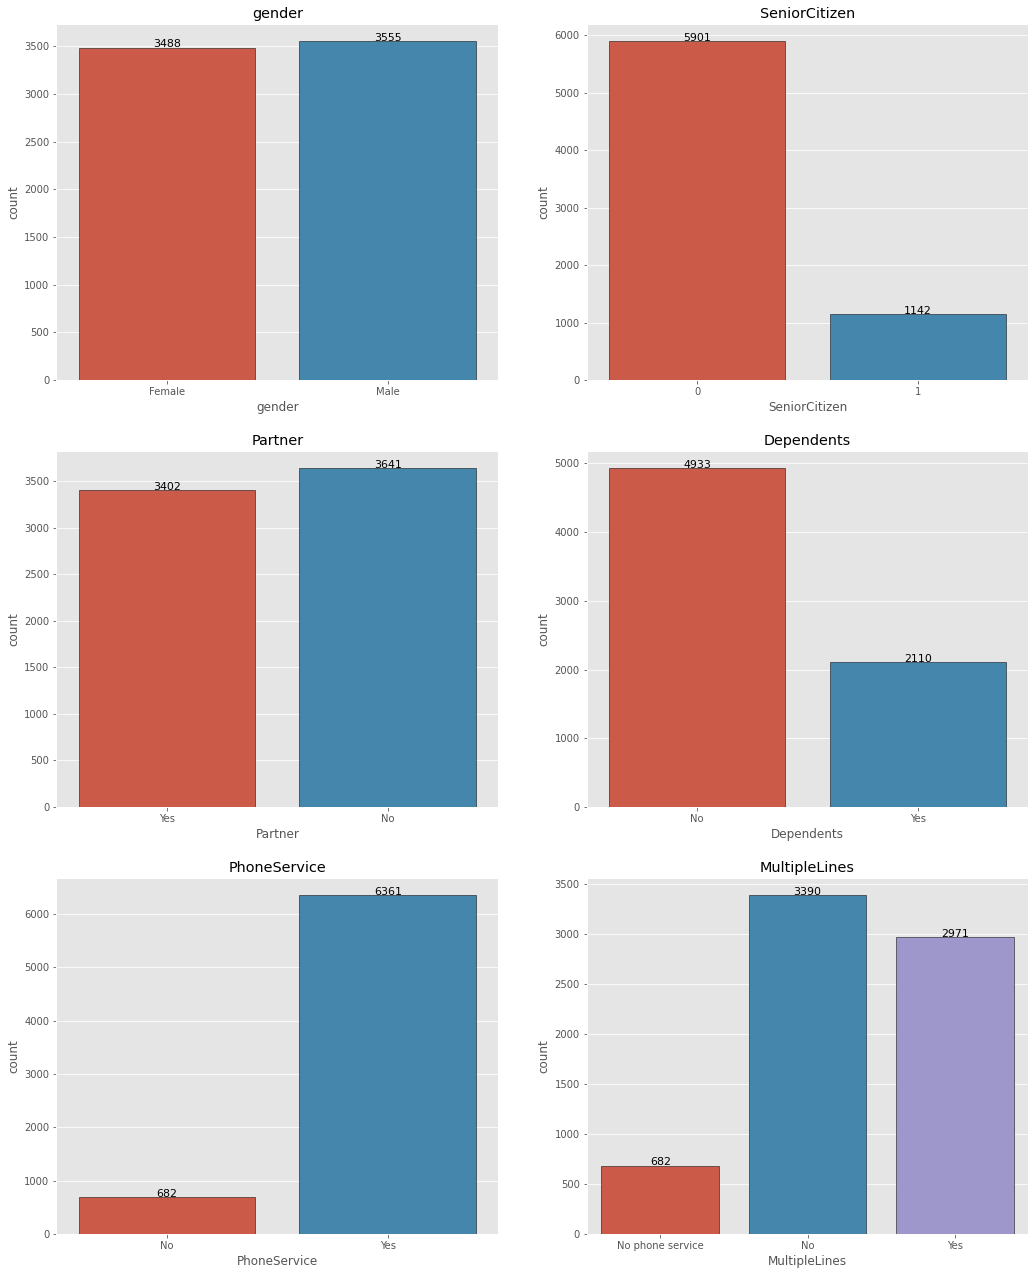

In [ ]:
fig = plt.subplots(nrows = 3,ncols = 2,figsize = (20,14))
plt.subplots_adjust(bottom=0.1, right=0.8, top=1.3)
catList = ['gender', 'SeniorCitizen', 'Partner','Dependents','PhoneService', 'MultipleLines']

for r in range(len(catList)):
  plt.subplot(3,2,r+1)
  ax = sns.countplot(catList[r], data=df, edgecolor='black')
  for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
  title = catList[r]
  plt.title(title)


In [ ]:
l1 = ['gender','SeniorCitizen','Partner','Dependents'] # Customer Information
l2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] # Services Signed Up for!
l3 = ['Contract','PaperlessBilling','PaymentMethod'] # Payment Information

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

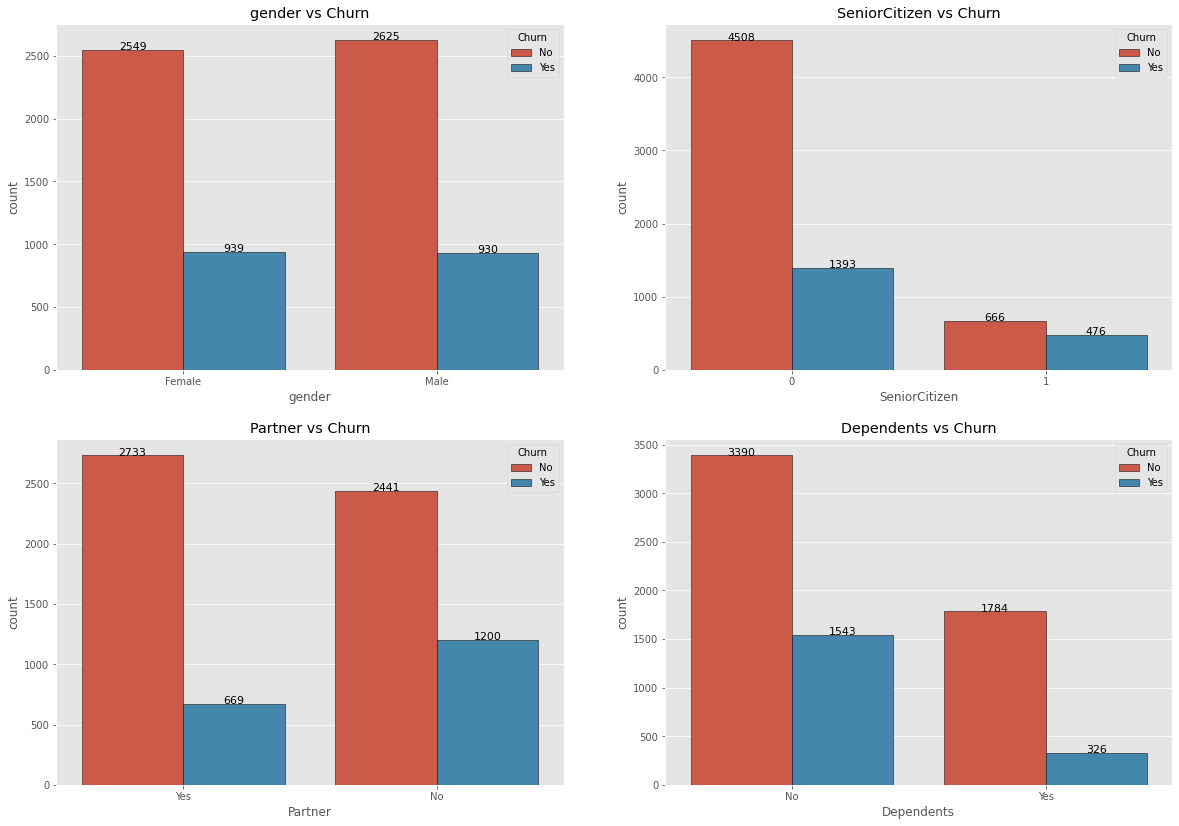

In [ ]:
# SUBPLOTS GUIDE

# Create a figure
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))

# Iterate through a list of columns
for i in range(len(l1)):

  # Indicate subplot no. of rows and columns
    plt.subplot(2,2,i+1)

    # Seaborn countplot
    ax = sns.countplot(l1[i],data = df,hue = "Churn", edgecolor = 'black')

    # Add labels on top of bars
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    
    # Add title
    title = l1[i] + ' vs Churn'
    plt.title(title);

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = df.copy(deep = True)
text_data_features = [i for i in list(df.columns) if i not in list(df.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


In [ ]:
col = list(df1.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features : tenure MonthlyCharges TotalCharges


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


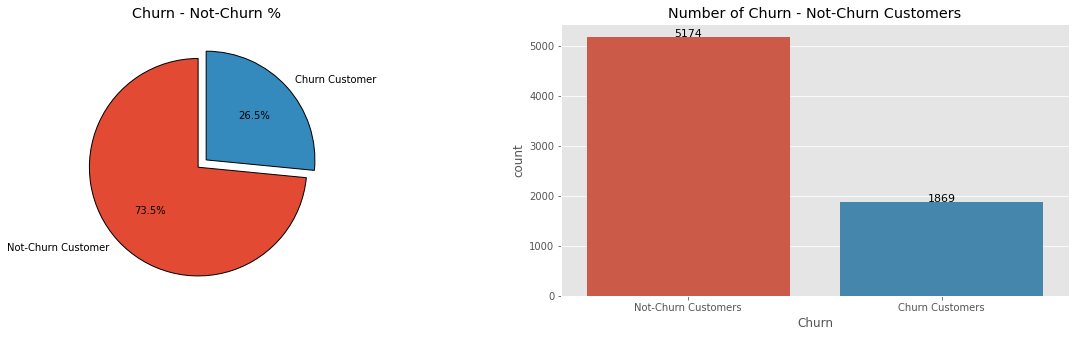

In [ ]:
l = list(df1['Churn'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['Not-Churn Customer','Churn Customer'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Churn - Not-Churn %');

plt.subplot(1,2,2)
ax = sns.countplot('Churn',data = df)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])
    
plt.title('Number of Churn - Not-Churn Customers');
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

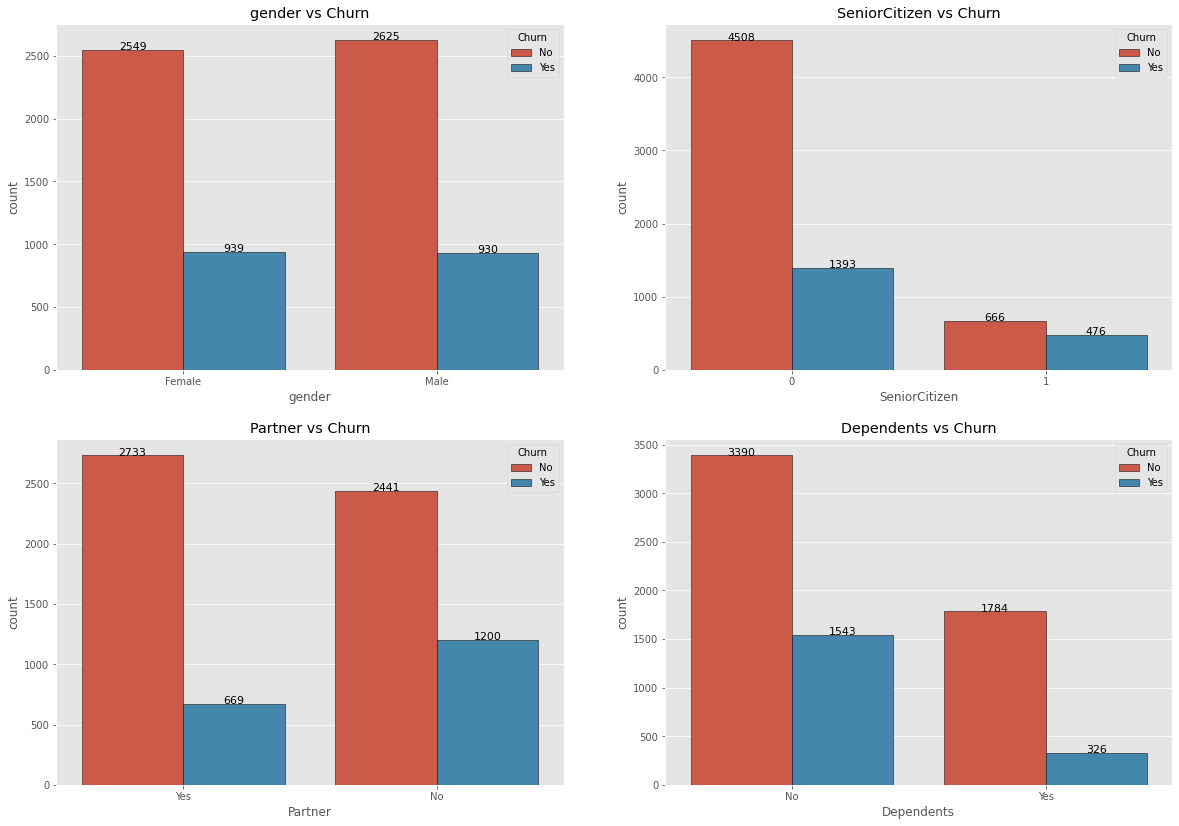

In [ ]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l1)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(l1[i],data = df,hue = "Churn",edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l1[i] + ' vs Churn'
    plt.title(title);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

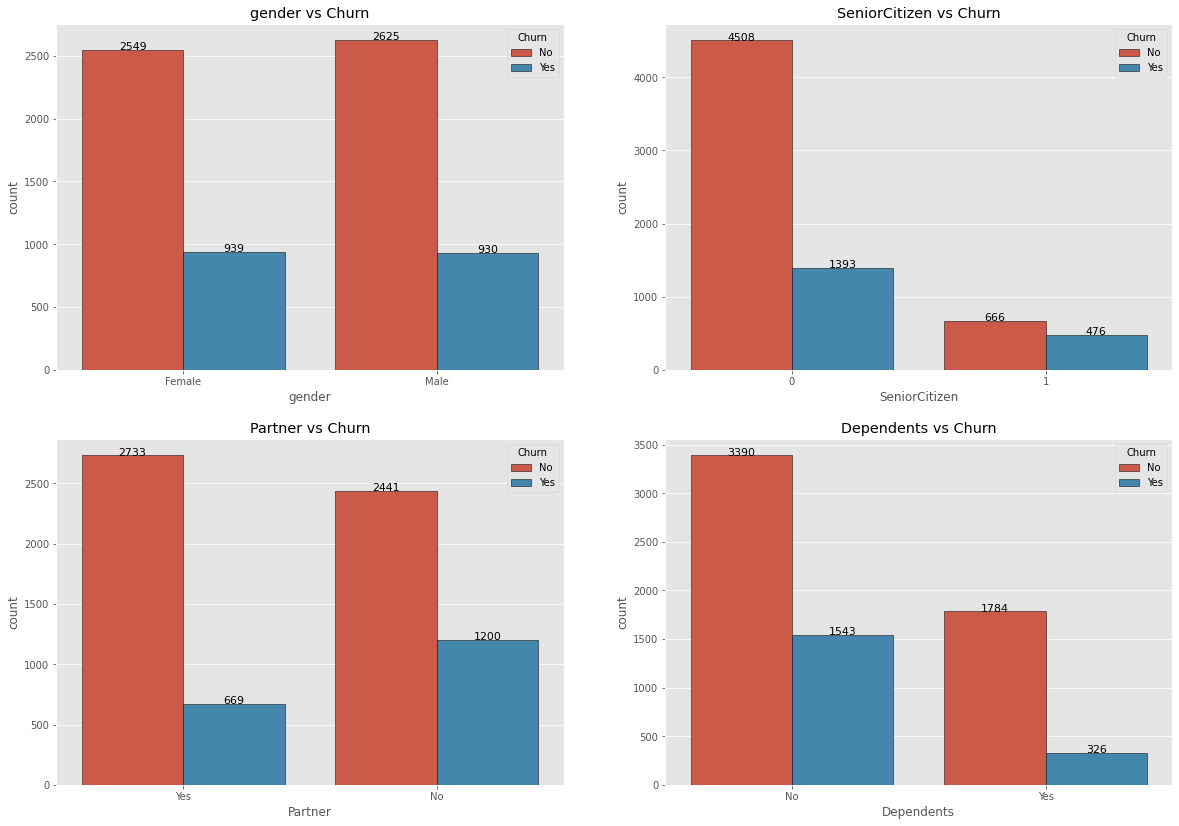

In [ ]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l1)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(l1[i],data = df,hue = "Churn",edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l1[i] + ' vs Churn'
    plt.title(title);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

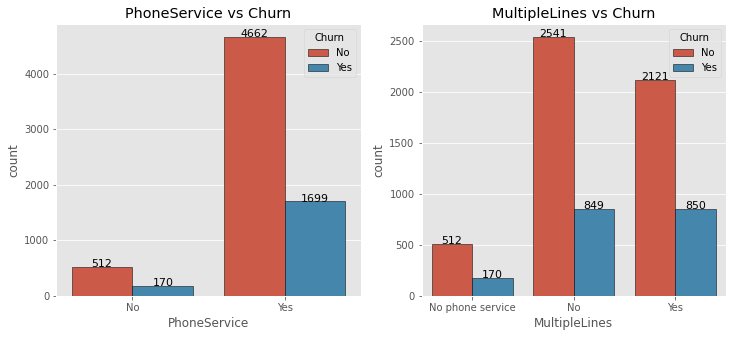

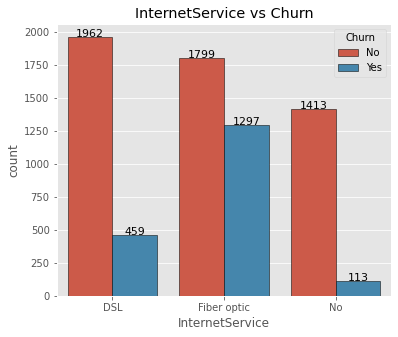

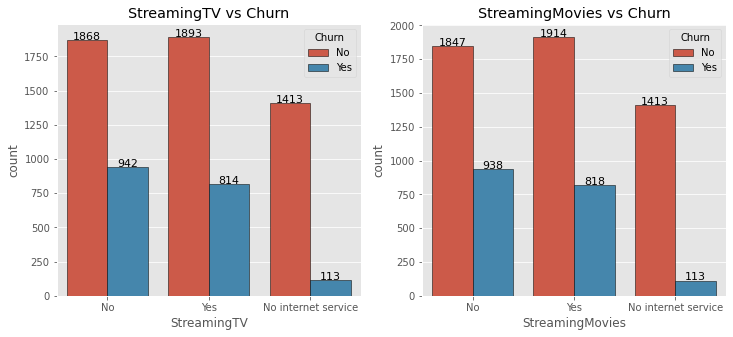

In [ ]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (12,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(l2[i],data = df,hue = "Churn",edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i] + ' vs Churn'
    plt.title(title);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))


plt.subplot(1,1,1)
ax = sns.countplot(l2[2],data = df,hue = "Churn",edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l2[2] + ' vs Churn'
plt.title(title);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(l2[i + 3],data = df,hue = "Churn",edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i + 3] + ' vs Churn'
    plt.title(title);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

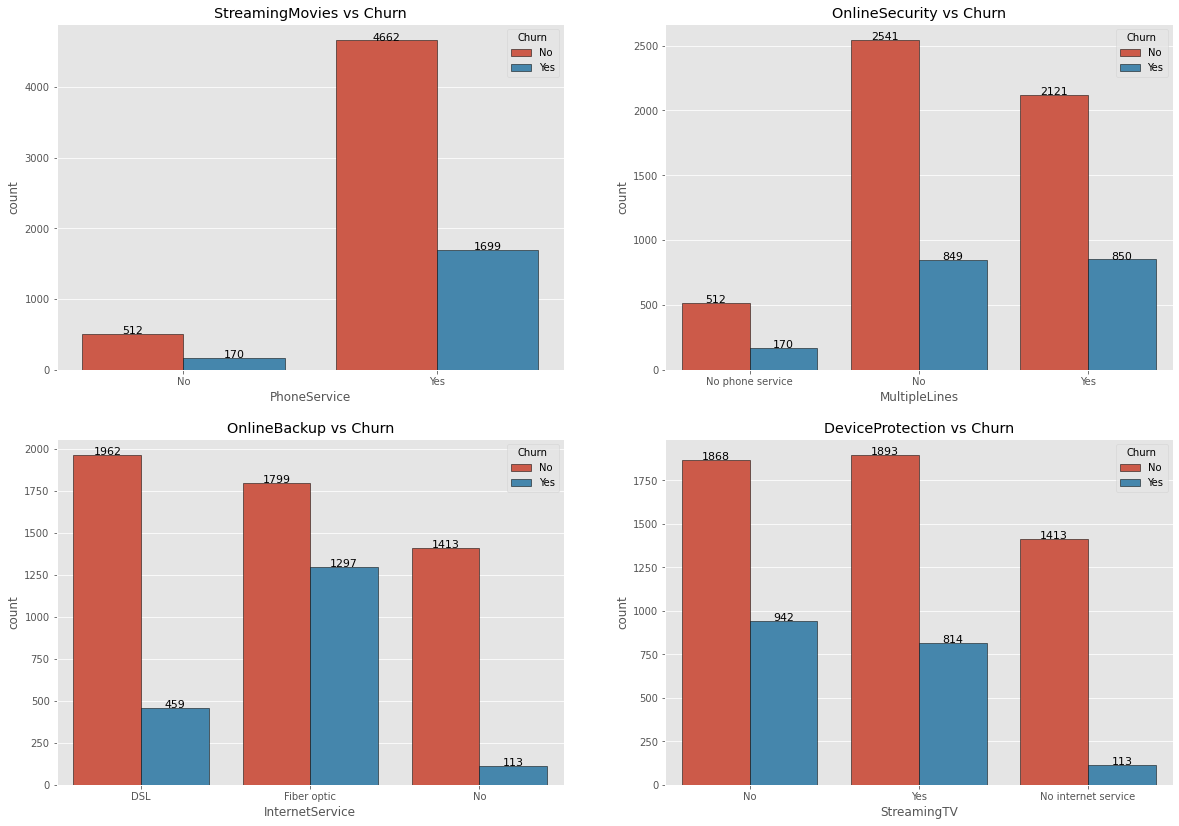

In [ ]:
fig = plt.subplots(nrows=2, ncols=2, figsize=(20,14))

for i in range(len(l2[:4])):
  plt.subplot(2,2,i+1)
  ax = sns.countplot(l2[i], data=df, hue='Churn', edgecolor='black')
  for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
  title = l2[4 + i] + ' vs Churn'
  plt.title(title);

In [ ]:
for i in range(len(l2[:4])):
  print(l2[4 + i] + ' vs Churn')


StreamingMovies vs Churn
OnlineSecurity vs Churn
OnlineBackup vs Churn
DeviceProtection vs Churn


In [ ]:
# All values on the right side of ':' means INCLUDE
print(l2)

# Start on index 4
print(l2[4:])

# End on index 4
print(l2[:4])

['PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
['StreamingMovies', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
['PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV']


In [ ]:
gender = df1[df1['Churn'] == 1]['gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100] # Female / Male

print(gender)

[50.24077046548957, 49.75922953451043]


In [ ]:
seniorcitizen = df1[df1['Churn'] == 1]['SeniorCitizen'].value_counts()
seniorcitizen = [seniorcitizen[0] / sum(seniorcitizen) * 100,seniorcitizen[1] / sum(seniorcitizen) * 100] # No - Yes

print(seniorcitizen)

[74.53183520599251, 25.468164794007492]


In [ ]:
partner = df1[df1['Churn'] == 1]['Partner'].value_counts()
partner = [partner[0] / sum(partner) * 100,partner[1] / sum(partner) * 100] # No - Yes

print(partner)

[64.20545746388443, 35.79454253611557]


In [ ]:
dependents = df1[df1['Churn'] == 1]['Dependents'].value_counts()
dependents = [dependents[0] / sum(dependents) * 100,dependents[1] / sum(dependents) * 100] # No - Yes

print(dependents)

[82.55751738897807, 17.442482611021937]


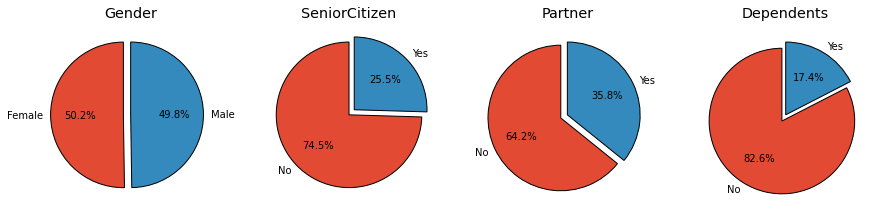

In [ ]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(gender,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender');

plt.subplot(1,4,2)
plt.pie(seniorcitizen,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('SeniorCitizen');

plt.subplot(1,4,3)
plt.pie(partner,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Partner');

plt.subplot(1,4,4)
plt.pie(dependents,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Dependents');


In [ ]:
phoneservice = df1[df1['Churn'] == 1]['PhoneService'].value_counts()
phoneservice = [phoneservice[0] / sum(phoneservice) * 100, phoneservice[1] / sum(phoneservice) * 100] # No - Yes

In [ ]:
multiplelines = df1[df1['Churn'] == 1]['MultipleLines'].value_counts()
multiplelines = [multiplelines[0] / sum(multiplelines) * 100, multiplelines[1] / sum(multiplelines) * 100, multiplelines[2] * 100 / sum(multiplelines)]


In [ ]:
internetservice = df1[df1['Churn'] == 1]['InternetService'].value_counts()
internetservice = [internetservice[0] / sum(internetservice) * 100,internetservice[1] / sum(internetservice) * 100, internetservice[2] / sum(internetservice) * 100] # DSL - Fiber Optic - No 

In [ ]:
streamingtv = df1[df1['Churn'] == 1]['StreamingTV'].value_counts()
streamingtv = [streamingtv[0] / sum(streamingtv) * 100,streamingtv[1] / sum(streamingtv) * 100, streamingtv[2] / sum(streamingtv) * 100] # No - No Internet Service - Yes 


In [ ]:
streamingmovies = df1[df1['Churn'] == 1]['StreamingMovies'].value_counts()
streamingmovies = [streamingmovies[0] / sum(streamingmovies) * 100,streamingmovies[1] / sum(streamingmovies) * 100, streamingmovies[2] / sum(streamingmovies) * 100] # No - No Internet Service - Yes 

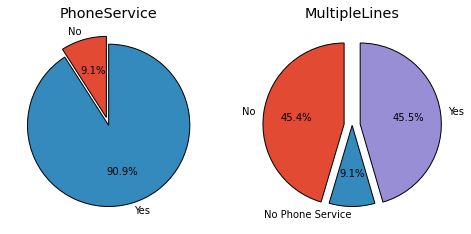

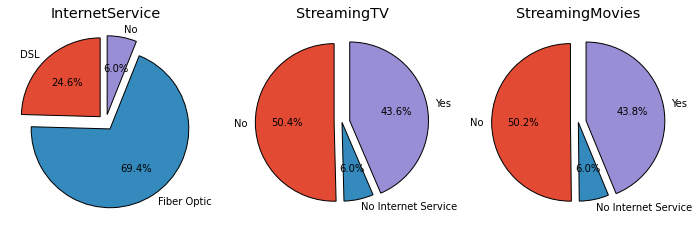

In [ ]:
ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (8,8))

plt.subplot(1,2,1)
plt.pie(phoneservice,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PhoneService');

plt.subplot(1,2,2)
plt.pie(multiplelines,labels = ['No','No Phone Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('MultipleLines');

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(internetservice,labels = ['DSL', 'Fiber Optic','No'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('InternetService');

plt.subplot(1,3,2)
plt.pie(streamingtv,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingTV');

plt.subplot(1,3,3)
plt.pie(streamingmovies,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingMovies');

In [ ]:
onlinesecurity = df1[df1['Churn'] == 1]['OnlineSecurity'].value_counts()
onlinesecurity = [onlinesecurity[0] / sum(onlinesecurity)*100, onlinesecurity[1] / sum(onlinesecurity)*100, onlinesecurity[2] / sum(onlinesecurity)*100]
print(onlinesecurity)

[78.1701444622793, 6.046013911182451, 15.783841626538257]


In [ ]:
onlinebackup = df1[df1['Churn'] == 1]['OnlineBackup'].value_counts()
onlinebackup = [onlinebackup[0] / sum(onlinebackup) * 100,onlinebackup[1] / sum(onlinebackup) * 100, onlinebackup[2] / sum(onlinebackup) * 100] # No - No Internet Service - Yes 
print(onlinebackup)

[65.97110754414125, 6.046013911182451, 27.9828785446763]


In [ ]:
deviceprotection = df1[df1['Churn'] == 1]['DeviceProtection'].value_counts()
deviceprotection = [deviceprotection[0] / sum(deviceprotection) * 100,deviceprotection[1] / sum(deviceprotection) * 100, deviceprotection[2] / sum(deviceprotection) * 100] # No - No Internet Service - Yes 

In [ ]:
techsupport = df1[df1['Churn'] == 1]['TechSupport'].value_counts()
techsupport = [techsupport[0] / sum(techsupport) * 100,techsupport[1] / sum(techsupport) * 100, techsupport[2] / sum(techsupport) * 100] # No - No Internet Service - Yes 

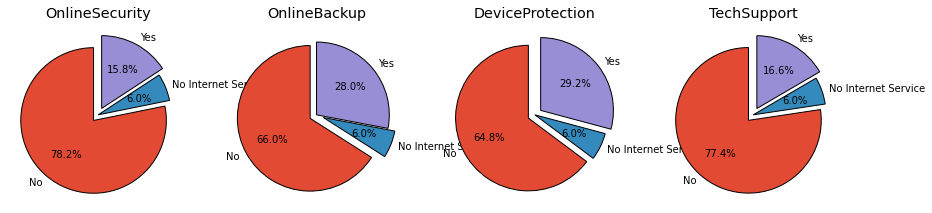

In [ ]:
ax, fig = plt.subplots(nrows=1, ncols=4, figsize=(15,15))

plt.subplot(1,4,1)
plt.pie(onlinesecurity,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineSecurity');

plt.subplot(1,4,2)
plt.pie(onlinebackup,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineBackup');

plt.subplot(1,4,3)
plt.pie(deviceprotection,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('DeviceProtection');

plt.subplot(1,4,4)
plt.pie(techsupport,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('TechSupport');



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

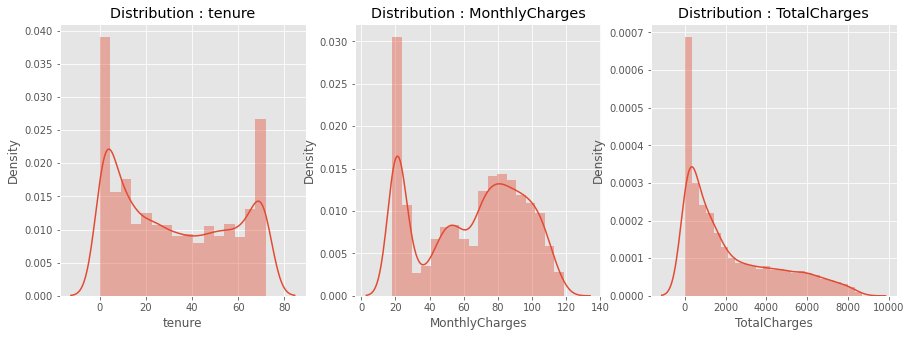

In [ ]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(len(numerical_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(df1[numerical_features[i]])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

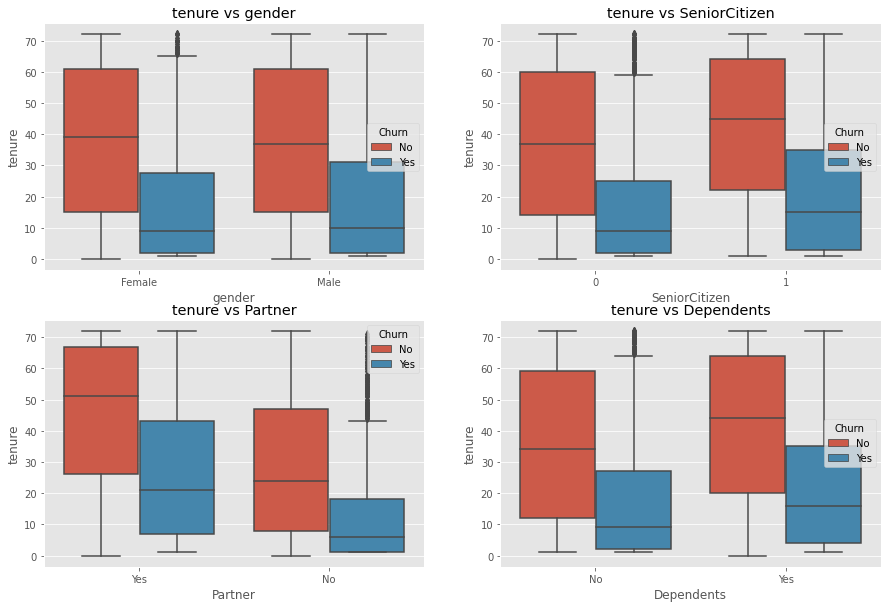

In [ ]:
# 3 types of customers should be targeted : SeniorCitizen, Living with a Partner, living all alone!

fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = l1[i],y = 'tenure',data = df,hue = 'Churn');
    plt.title('tenure vs ' + l1[i]);

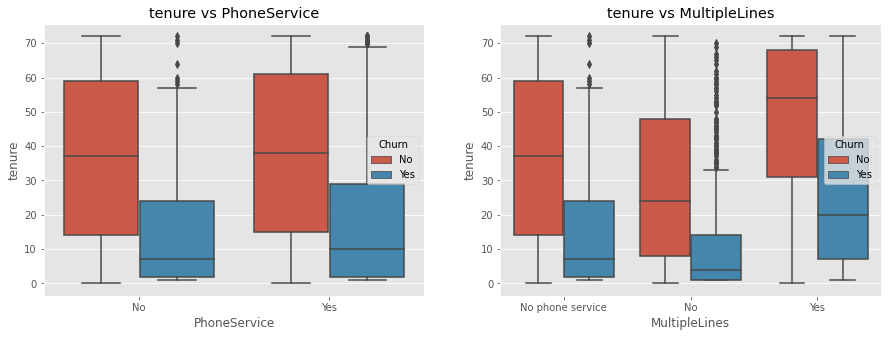

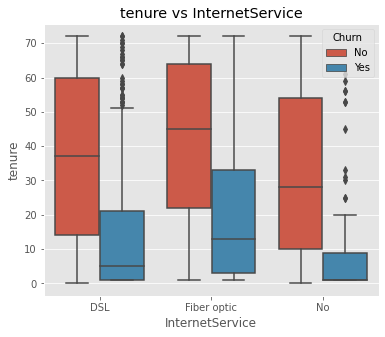

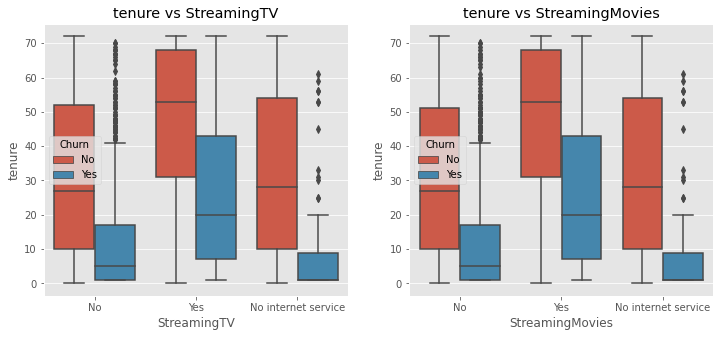

In [ ]:
fig = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

for i in range(len(l2[:2])):
  plt.subplot(1,2,i+1)
  ax = sns.boxplot(x=l2[i], y='tenure', data=df, hue='Churn')
  plt.title('tenure vs ' + l2[i])

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.boxplot(x = l2[2],y = 'tenure',data = df,hue = 'Churn');
plt.title('tenure vs ' + l2[2]);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i + 3],y = 'tenure',data = df,hue = 'Churn');
    plt.title('tenure vs ' + l2[i + 3]);



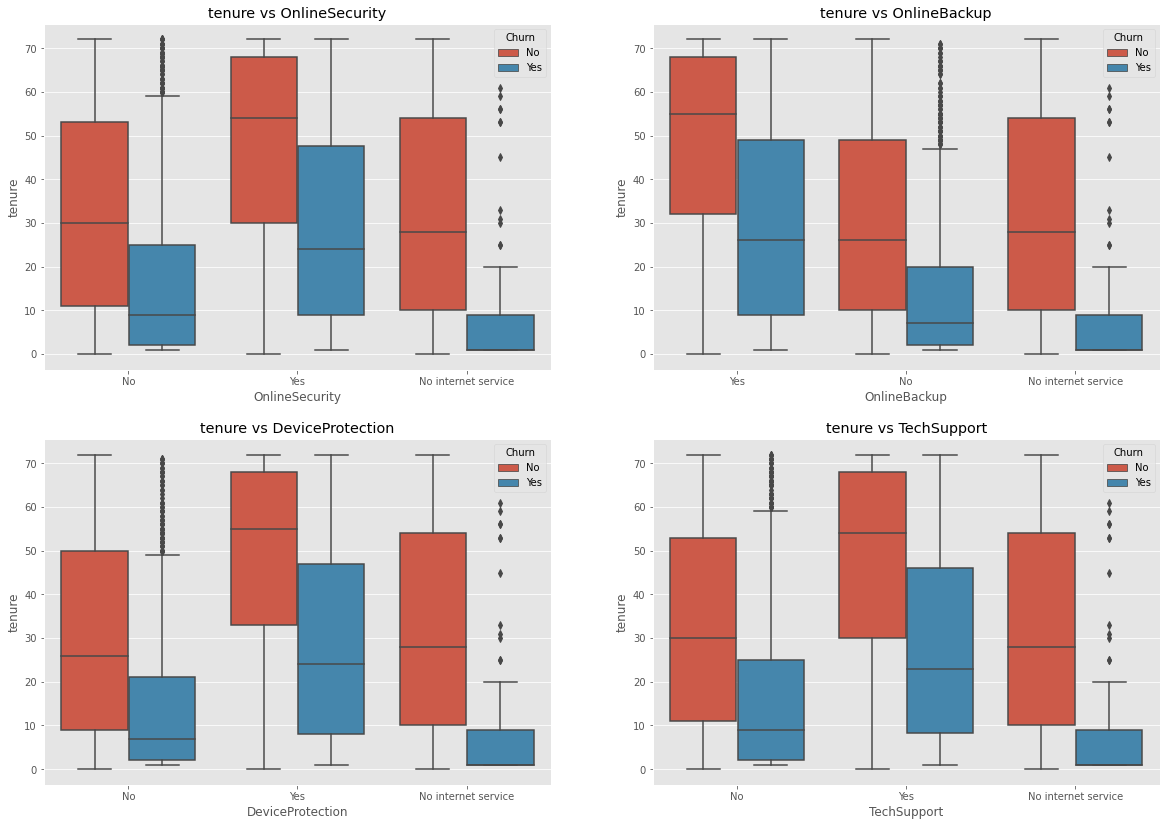

In [ ]:
# For the tenure of 1st 6 months, it needs to focus extensively on OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport 

fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
  plt.subplot(2,2,i+1)
  ax = sns.boxplot(x=l2[i-4], y='tenure', data=df, hue='Churn')
  plt.title('tenure vs ' + l2[i-4]);

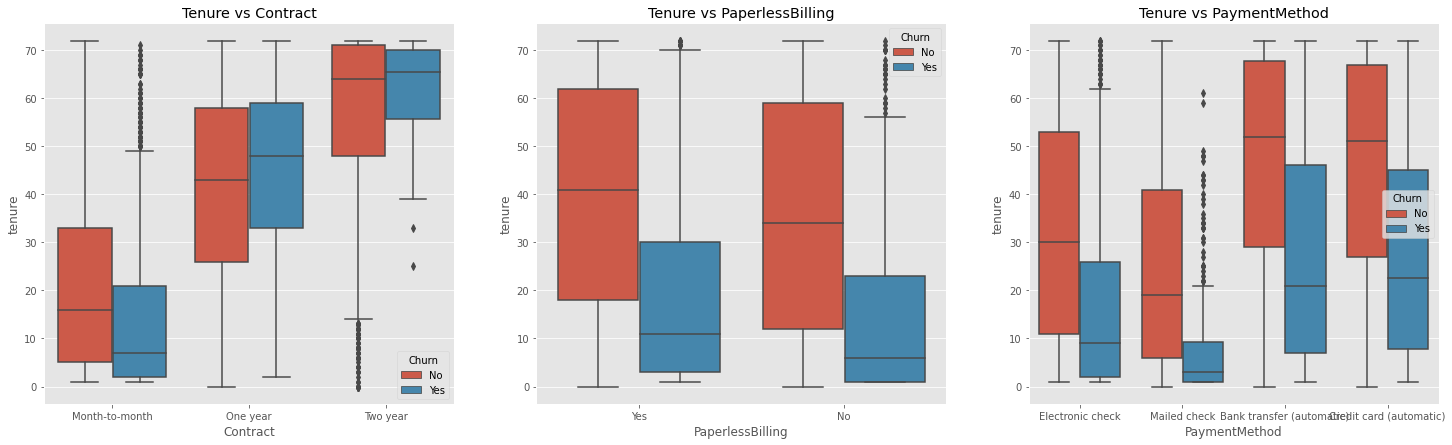

In [ ]:
# It needs to put an end to the Electronic check

fig = plt.subplots(nrows=1, ncols=3, figsize=(25,7))

for i in range(len(l3)):
  plt.subplot(1,3,i+1)
  ax = sns.boxplot(x=l3[i], y='tenure', data=df, hue='Churn')
  plt.title('Tenure vs ' + l3[i])

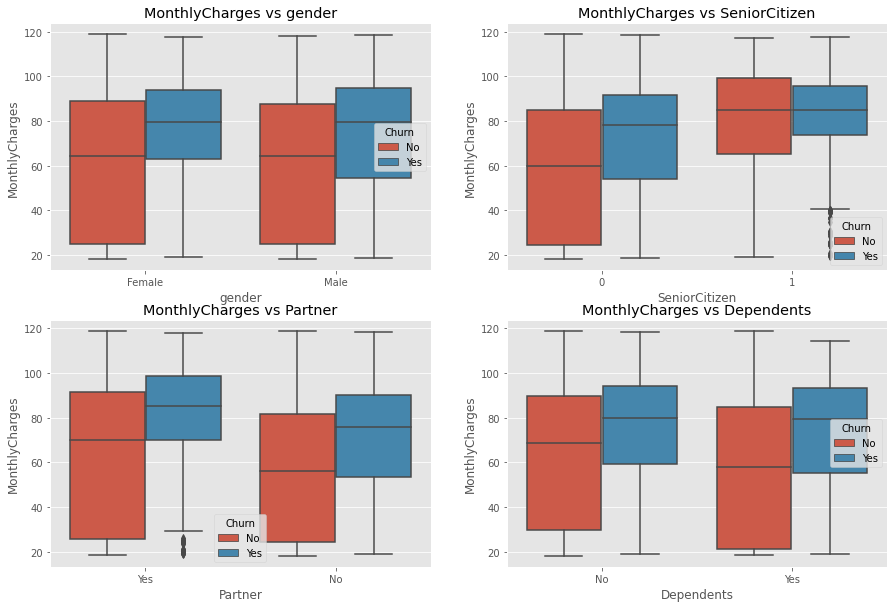

In [174]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = l1[i],y = 'MonthlyCharges',data = df,hue = 'Churn'); 
    plt.title('MonthlyCharges vs ' + l1[i]);

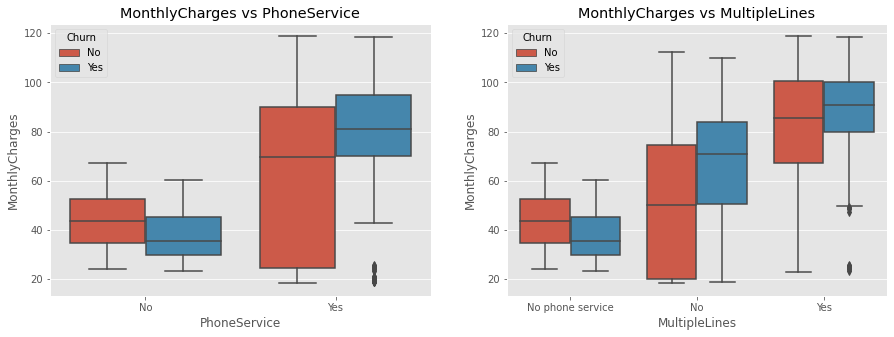

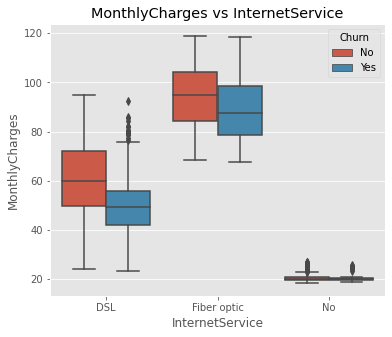

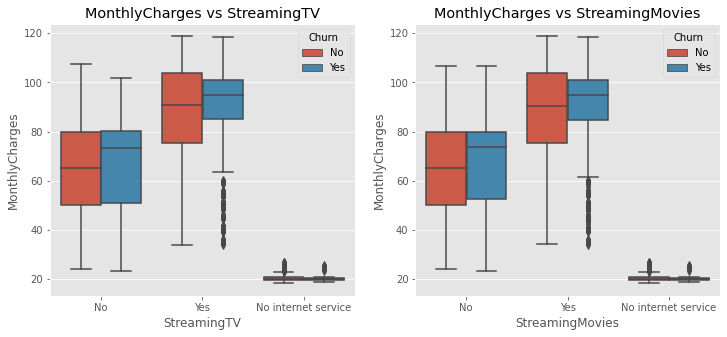

In [176]:
# Create combinations of options provided for PhoneService & InternetService 

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i],y = 'MonthlyCharges',data = df,hue = 'Churn');
    plt.title('MonthlyCharges vs ' + l2[i]);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.boxplot(x = l2[2],y = 'MonthlyCharges',data = df,hue = 'Churn');
plt.title('MonthlyCharges vs ' + l2[2]);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i + 3],y = 'MonthlyCharges',data = df,hue = 'Churn');
    plt.title('MonthlyCharges vs ' + l2[i + 3]);

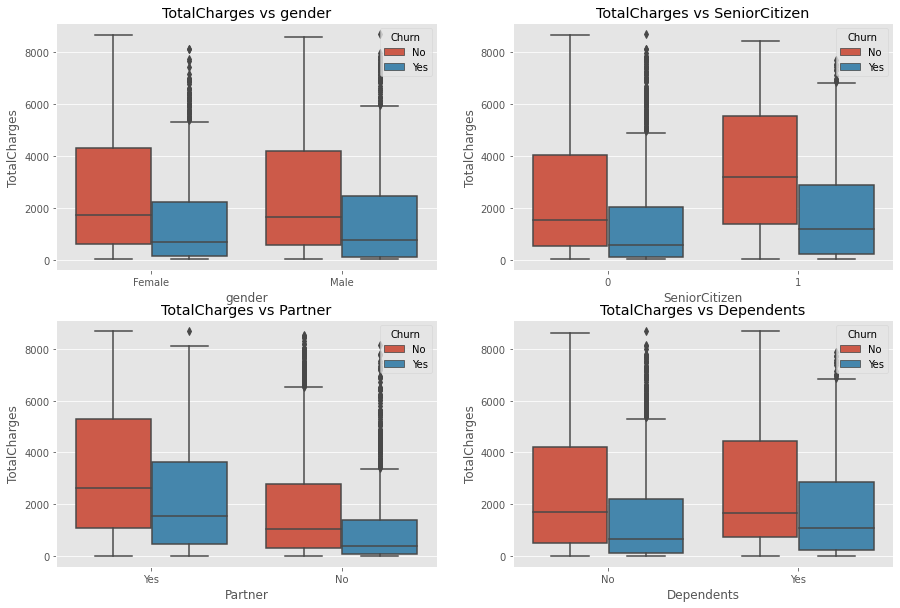

In [ ]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = l1[i],y = 'TotalCharges',data = df,hue = 'Churn');
    plt.title('TotalCharges vs ' + l1[i]);

In [ ]:
# FEATURE ENGINEERING

from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['tenure'] = mms.fit_transform(df1[['tenure']])
df1['MonthlyCharges'] = mms.fit_transform(df1[['MonthlyCharges']])
df1['TotalCharges'] = mms.fit_transform(df1[['TotalCharges']])
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1


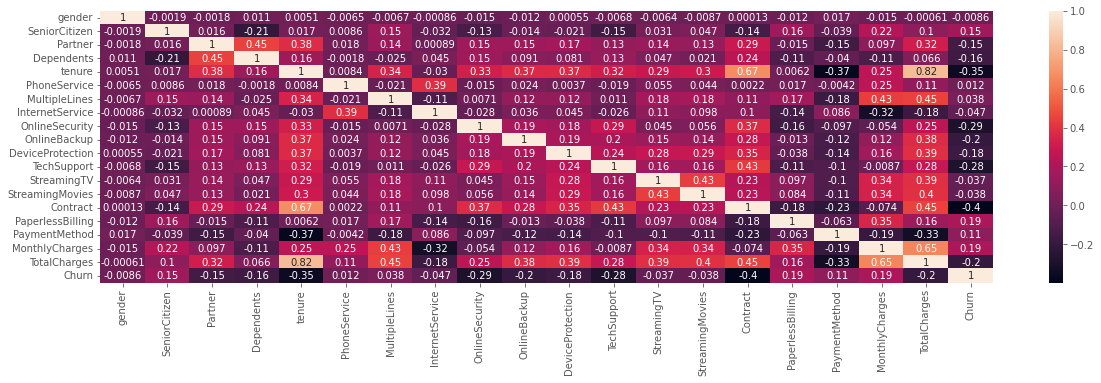

In [ ]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),annot = True);

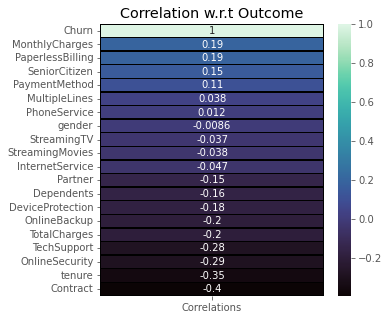

In [ ]:
# CORRELATION CHECKING

corr = df1.corrwith(df1['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,linewidths = 0.4,linecolor = 'black', cmap='mako');
plt.title('Correlation w.r.t Outcome');

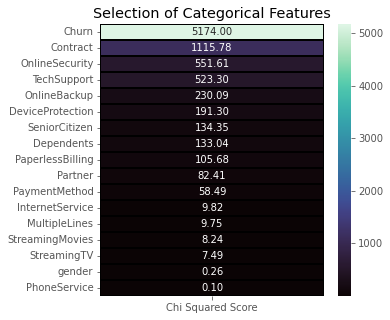

In [ ]:
# SELECTING CATEGORICAL FEATURES

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif

features = df1.loc[:,categorical_features]
target = df1.loc[:,'Churn']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap="mako",linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

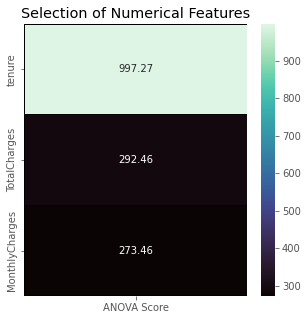

In [ ]:
# PRESENTING THE BEST NUMERICAL FEATURES

from sklearn.feature_selection import f_classif

features = df1.loc[:,numerical_features]
target = df1.loc[:,'Churn']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = 'mako',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');


In [ ]:
# DROP COLUMNS SHOWING NO CORRELATION

df1.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'],inplace = True)
df1.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0.013889,0,2,0,0,0,1,2,0.115423,0.001275,0
1,0,0,0,0.472222,2,0,2,0,1,0,3,0.385075,0.215867,0
2,0,0,0,0.027778,2,2,0,0,0,1,3,0.354229,0.010310,1
3,0,0,0,0.625000,2,0,2,2,1,0,0,0.239303,0.210241,0
4,0,0,0,0.027778,0,0,0,0,0,1,2,0.521891,0.015330,1


In [ ]:
# COPING WITH UNBALANCED DATA

import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy = 1)

f1 = df1.iloc[:,:13].values
t1 = df1.iloc[:,13].values

f1, t1 = over.fit_resample(f1, t1)
Counter(t1)



Counter({0: 5174, 1: 5174})

In [ ]:
# CREATING THE MODEL

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.20, random_state = 2)

In [ ]:
def model(classifier,x_train,y_train,x_test,y_test):
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))



Cross Validation Score :  90.29%
ROC_AUC Score :  82.68%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


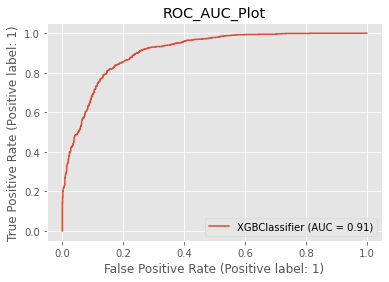

In [ ]:
# from xgboost import XGBClassifier

# classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
# model(classifier_xgb,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1040
           1       0.80      0.87      0.83      1030

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



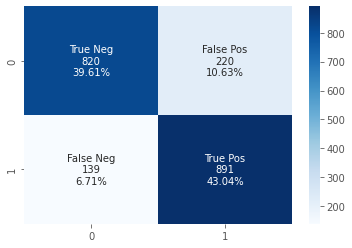

In [ ]:
# model_evaluation(classifier_xgb,x_test,y_test)

In [ ]:
# from lightgbm import LGBMClassifier

# classifier_lgbm = LGBMClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 100)
# model(classifier_lgbm,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.86      0.68      0.76      1040
           1       0.73      0.89      0.80      1030

    accuracy                           0.78      2070
   macro avg       0.80      0.78      0.78      2070
weighted avg       0.80      0.78      0.78      2070



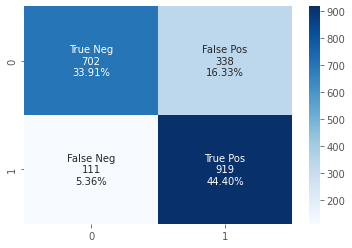

In [ ]:
# model_evaluation(classifier_lgbm,x_test,y_test)

Cross Validation Score :  85.48%
ROC_AUC Score :  78.68%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


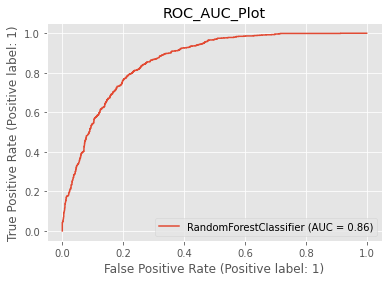

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)
# model(classifier_rf,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.83      0.72      0.77      1040
           1       0.75      0.86      0.80      1030

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



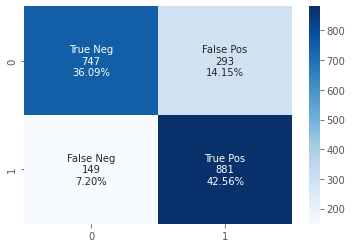

In [ ]:
# model_evaluation(classifier_rf,x_test,y_test)

Cross Validation Score :  84.01%
ROC_AUC Score :  78.02%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


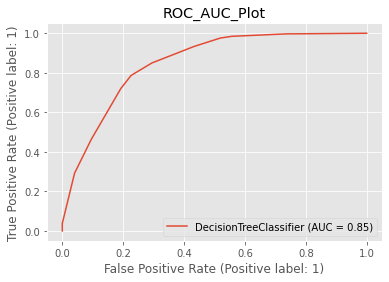

In [ ]:
# from sklearn.tree import DecisionTreeClassifier

# classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)
# model(classifier_dt,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1040
           1       0.78      0.79      0.78      1030

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



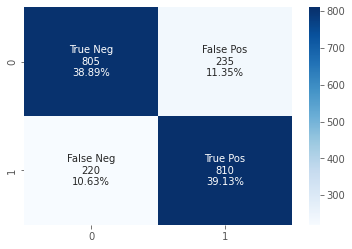

In [ ]:
# model_evaluation(classifier_dt,x_test,y_test)

Cross Validation Score :  90.60%
ROC_AUC Score :  82.87%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


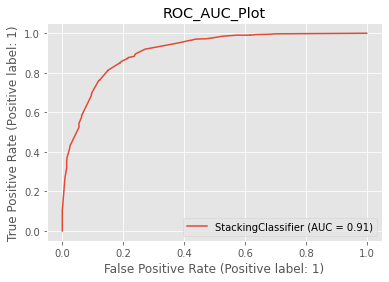

In [ ]:
# from sklearn.ensemble import StackingClassifier

# stack = StackingClassifier(estimators = [('classifier_xgb',classifier_xgb),
#                                          ('classifier_lgbm',classifier_lgbm),
#                                          ('classifier_rf',classifier_rf),
#                                          ('classifier_dt',classifier_dt)],
#                            final_estimator = classifier_lgbm)
# model(stack,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1040
           1       0.80      0.87      0.83      1030

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



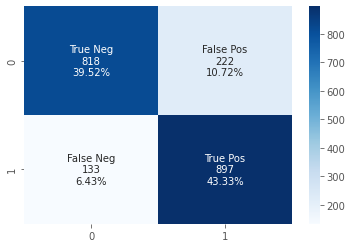

In [ ]:
# model_evaluation(stack,x_test,y_test)